In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Create a Stan model, which will consist of only ```generated quantites``` block.
2. In this block define integer variable ```N``` for number of trials equal to 50, integer variable ```y``` for number of successes and real ```p``` for probability of allergic reaction. Remember to use necessary constraints.
3. Assign a prior for  ```p``` (appropriate random number generator) that will represent our knowledge about typical cases. You can do it either analytically or by using simulations. 
4. Sample from binomial distribution, that will use ```N``` and sampled ```p``` to generate number of allergic reactions ```y```.
5. Generate 1000 samples (pair of ```p``` an ```y```) by calling appropriate method in ```cmdstanpy```. Remeber to set ```fixed_param=True```.
6. Compute ratio of allergic reactions for each sample and create a histogram.
7. Verify if mean of the ratio is consistent with prior knowledge, otherwise modify prior parameters. Describe your reasoning in the report. 


In [49]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /home/Lab3/code_1.stan to exe file /home/Lab3/code_1
INFO:cmdstanpy:compiled model executable: /home/Lab3/code_1


In [50]:
samples = gen_quant.sample(data={"N":50},
                           fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [53]:
samples_df = samples.draws_pd()
samples_df

,lp__,accept_stat__,y,theta
0,0.0,0.0,7.0,0.151798
1,0.0,0.0,11.0,0.201763
2,0.0,0.0,9.0,0.219548
3,0.0,0.0,14.0,0.186388
4,0.0,0.0,5.0,0.186540
...,...,...,...,...
995,0.0,0.0,8.0,0.201537
996,0.0,0.0,11.0,0.186304
997,0.0,0.0,9.0,0.216461
998,0.0,0.0,6.0,0.194903


[]

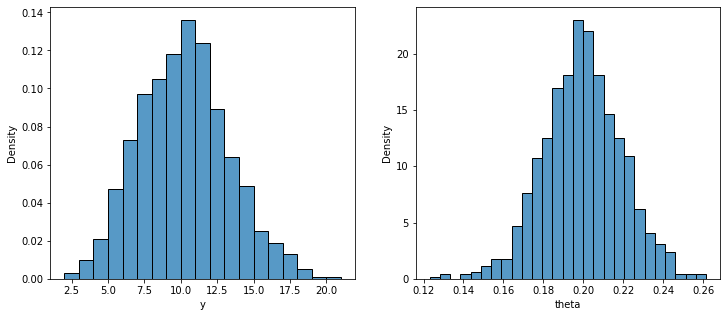

In [62]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=samples_df, x="y", stat="density", ax=axs[0])
sns.histplot(data=samples_df, x="theta", stat="density", ax=axs[1])
plt.plot()

In [64]:
samples_df["theta_verify"] = 1 - (50 - samples_df["y"])/50
samples_df

,lp__,accept_stat__,y,theta,theta_verify
0,0.0,0.0,7.0,0.151798,0.14
1,0.0,0.0,11.0,0.201763,0.22
2,0.0,0.0,9.0,0.219548,0.18
3,0.0,0.0,14.0,0.186388,0.28
4,0.0,0.0,5.0,0.186540,0.10
...,...,...,...,...,...
995,0.0,0.0,8.0,0.201537,0.16
996,0.0,0.0,11.0,0.186304,0.22
997,0.0,0.0,9.0,0.216461,0.18
998,0.0,0.0,6.0,0.194903,0.12


[]

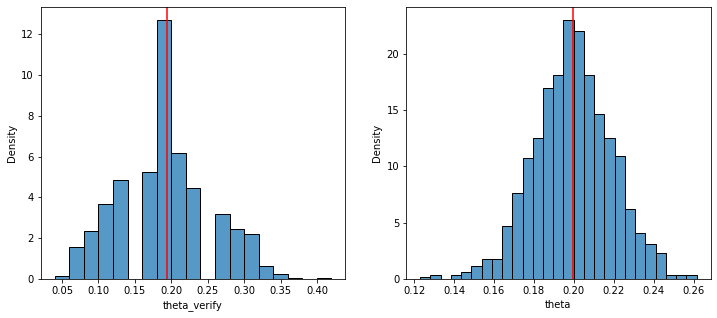

In [79]:
mean_theta = samples_df["theta"].mean()
mean_theta_verify = samples_df["theta_verify"].mean()

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=samples_df, x="theta_verify", stat="density", ax=axs[0])
axs[0].axvline(mean_theta_verify, ymin=0, ymax=12, color="r")

sns.histplot(data=samples_df, x="theta", stat="density", ax=axs[1])
axs[1].axvline(mean_theta, ymin=0, ymax=23, color="r")
plt.plot()

In [82]:
print(f"mean_theta = {mean_theta:.3f}, mean_theta_verify={mean_theta_verify:.3f}, diff={np.abs(mean_theta - mean_theta_verify):.3f}")

mean_theta = 0.200, mean_theta_verify=0.194, diff=0.005


In [70]:
axs[1]

<AxesSubplot:>

In [71]:
axs

array([<AxesSubplot:xlabel='theta_verify', ylabel='Density'>,
       <AxesSubplot:>], dtype=object)